<h1>contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Image---list-of-pixels" data-toc-modified-id="Image---list-of-pixels-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Image - list of pixels</a></span></li><li><span><a href="#Pyramids" data-toc-modified-id="Pyramids-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pyramids</a></span><ul class="toc-item"><li><span><a href="#Expand-Image" data-toc-modified-id="Expand-Image-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Expand Image</a></span></li><li><span><a href="#Shrink-Image" data-toc-modified-id="Shrink-Image-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Shrink Image</a></span></li><li><span><a href="#Pyramid" data-toc-modified-id="Pyramid-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Pyramid</a></span></li></ul></li><li><span><a href="#Channel-Extraction" data-toc-modified-id="Channel-Extraction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Channel Extraction</a></span><ul class="toc-item"><li><span><a href="#Color-Channel" data-toc-modified-id="Color-Channel-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Color Channel</a></span><ul class="toc-item"><li><span><a href="#Image-to-Greyscal" data-toc-modified-id="Image-to-Greyscal-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Image to Greyscal</a></span></li><li><span><a href="#Extract-Color-Channels" data-toc-modified-id="Extract-Color-Channels-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Extract Color Channels</a></span></li><li><span><a href="#red-channel" data-toc-modified-id="red-channel-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>red channel</a></span></li><li><span><a href="#green-channel" data-toc-modified-id="green-channel-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>green channel</a></span></li><li><span><a href="#blue-channel" data-toc-modified-id="blue-channel-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>blue channel</a></span></li></ul></li><li><span><a href="#Gradient-Channels" data-toc-modified-id="Gradient-Channels-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Gradient Channels</a></span><ul class="toc-item"><li><span><a href="#Gradient-Magnitudes" data-toc-modified-id="Gradient-Magnitudes-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Gradient Magnitudes</a></span><ul class="toc-item"><li><span><a href="#Laplacian" data-toc-modified-id="Laplacian-3.2.1.1"><span class="toc-item-num">3.2.1.1&nbsp;&nbsp;</span>Laplacian</a></span></li><li><span><a href="#Sobel---x---horizontal" data-toc-modified-id="Sobel---x---horizontal-3.2.1.2"><span class="toc-item-num">3.2.1.2&nbsp;&nbsp;</span>Sobel - x - horizontal</a></span></li><li><span><a href="#Sobel---y--vertical" data-toc-modified-id="Sobel---y--vertical-3.2.1.3"><span class="toc-item-num">3.2.1.3&nbsp;&nbsp;</span>Sobel - y -vertical</a></span></li></ul></li><li><span><a href="#Histogram-of-Gradients-(HOG)" data-toc-modified-id="Histogram-of-Gradients-(HOG)-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Histogram of Gradients (HOG)</a></span></li></ul></li></ul></li><li><span><a href="#Edges" data-toc-modified-id="Edges-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Edges</a></span></li><li><span><a href="#Vectorization" data-toc-modified-id="Vectorization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Vectorization</a></span></li><li><span><a href="#Algorithm---All-Together" data-toc-modified-id="Algorithm---All-Together-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Algorithm - All Together</a></span><ul class="toc-item"><li><span><a href="#AdaBoost-...or-XGBoost-...or-Deep-Learning" data-toc-modified-id="AdaBoost-...or-XGBoost-...or-Deep-Learning-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>AdaBoost ...or XGBoost ...or Deep Learning</a></span></li></ul></li></ul></div>

# Algorithm Pythonic Implementation

In [101]:
from PIL import Image, ImageFilter
import numpy as np
from numpy import *
from skimage.feature import hog
from scipy.ndimage import filters
import cv2

## Image - list of pixels

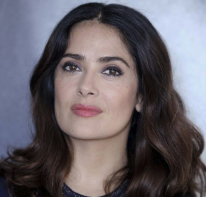

image dims:  (206, 197)
162328
RGB counts:  162328


In [103]:
x = Image.open('selma.png') # open image
display(x)
print('image dims: ', x.size)
print(
    x.size[0] * 
    x.size[1] * 
    4) # R, G, B, a
print("RGB counts: " , len(np.array(x).flatten().tolist()))

## Pyramids

### Expand Image

ratio:  1.0456852791878173
NEAREST


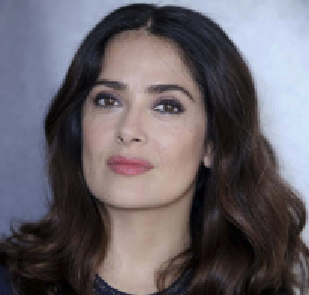

BILINEAR


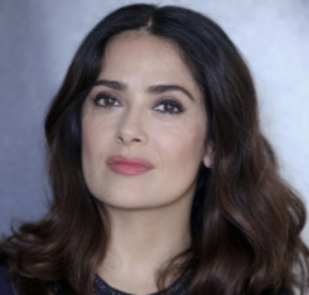

BICUBIC


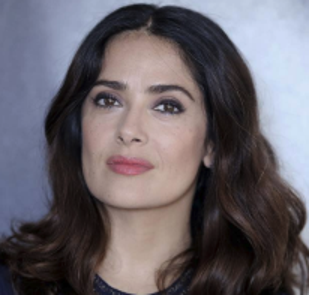

ANTIALIAS


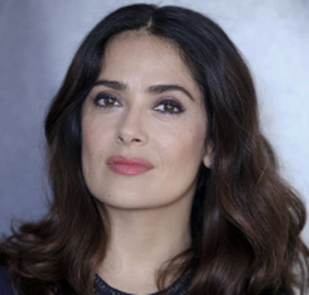

In [105]:
x = Image.open('selma.png') # open image
w = x.size[0]
h = x.size[1]
ratio = w/h
print('ratio: ', ratio)

w = int(w * 1.5)
h = int(h * 1.5)

print('NEAREST')
display(x.resize((w, h), Image.NEAREST))      # use nearest neighbour
print('BILINEAR')
display(x.resize((w, h), Image.BILINEAR))     # linear interpolation in a 2x2 environment
print('BICUBIC')
display(x.resize((w, h), Image.BICUBIC))      # cubic spline interpolation in a 4x4 environment
print('ANTIALIAS')
display(x.resize((w, h), Image.ANTIALIAS))    # best down-sizing filter

### Shrink Image

ratio:  1.0456852791878173
NEAREST


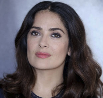

BILINEAR


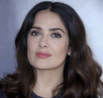

BICUBIC


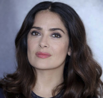

ANTIALIAS


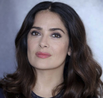

In [106]:
x = Image.open('selma.png') # open image
w = x.size[0]
h = x.size[1]
ratio = w/h
print('ratio: ', ratio)

w = int(w / 2)
h = int(h / 2)

print('NEAREST')
display(x.resize((w, h), Image.NEAREST))      # use nearest neighbour
print('BILINEAR')
display(x.resize((w, h), Image.BILINEAR))     # linear interpolation in a 2x2 environment
print('BICUBIC')
display(x.resize((w, h), Image.BICUBIC))      # cubic spline interpolation in a 4x4 environment
print('ANTIALIAS')
display(x.resize((w, h), Image.ANTIALIAS))    # best down-sizing filter

### Pyramid

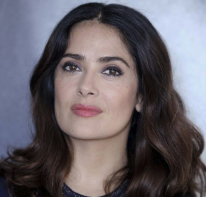

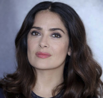

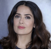

In [129]:
x = Image.open('selma.png') # open image
x = Image.open('selma.png') # open image
display(x)
w = x.size[0]
h = x.size[1]
ratio = w/h

for index in range(1, 5):
    w = int(w / 2)
    h = int(h / 2)
    display(x.resize((w, h), Image.BICUBIC))      # cubic spline interpolation in a 4x4 environment


## Channel Extraction

### Color Channel

#### Image to Greyscal

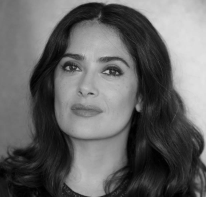

In [109]:
x = Image.open('selma.png') # open image
x = x.convert('L') # convert to gray
display(x)

#### Extract Color Channels

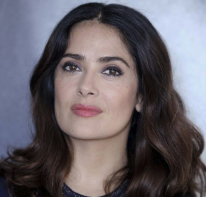

In [114]:
x = Image.open('selma.png') # open image
display(x)
red, green, blue, alpha = x.split()
# red, green, blue, alpha = x.split()

#### red channel

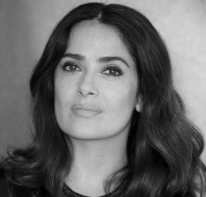

In [111]:
red

#### green channel

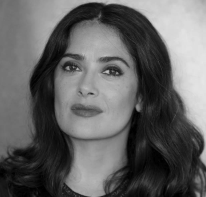

In [112]:
green

#### blue channel

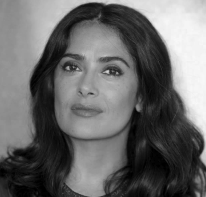

In [113]:
blue

### Gradient Channels

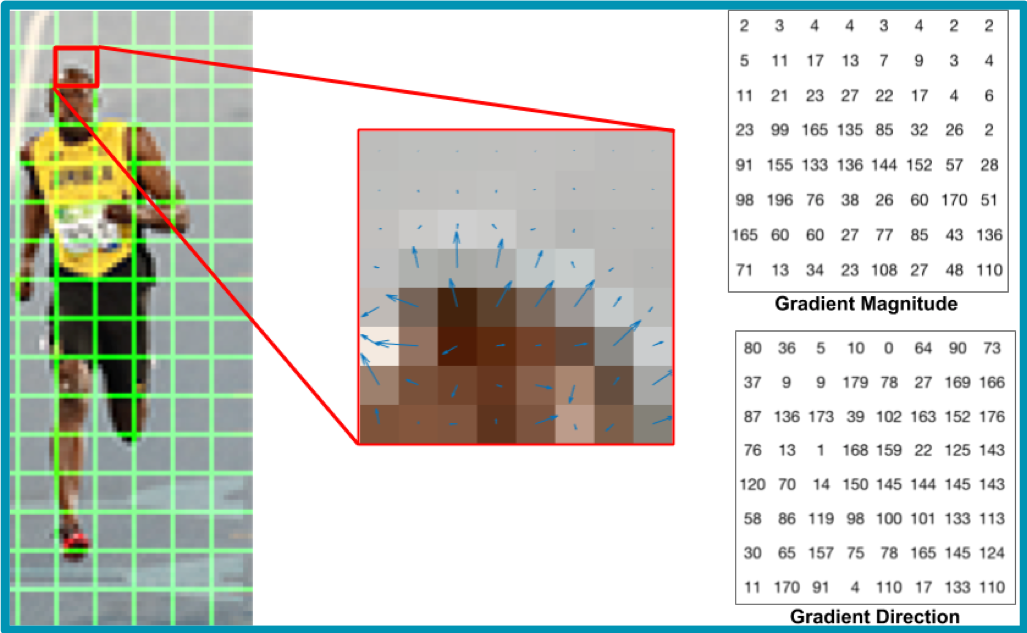

In [130]:
g = Image.open('gradients.png') # open image
display(g)

#### Gradient Magnitudes

##### Laplacian

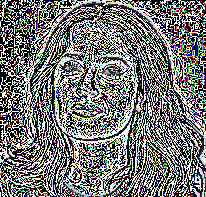

In [123]:
x = cv2.imread('selma.png')
#Laplacian
display(Image.fromarray(cv2.Laplacian(x,cv2.CV_64F).astype("uint8"), 'RGB'))

##### Sobel - x - horizontal

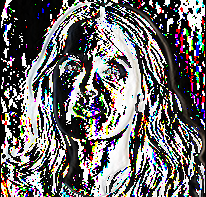

In [124]:
x = cv2.imread('selma.png')
#Sobel X
x = cv2.Sobel(x,cv2.CV_64F,1,0,ksize=1)
display(Image.fromarray(x.astype("uint8"), 'RGB'))

##### Sobel - y -vertical

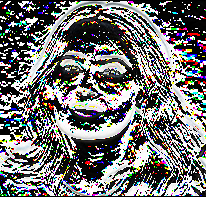

In [125]:
x = cv2.imread('selma.png')
#Sobel Y
x = cv2.Sobel(x,cv2.CV_64F,0,1,ksize=1)
display(Image.fromarray(x.astype("uint8"), 'RGB'))

#### Histogram of Gradients (HOG)

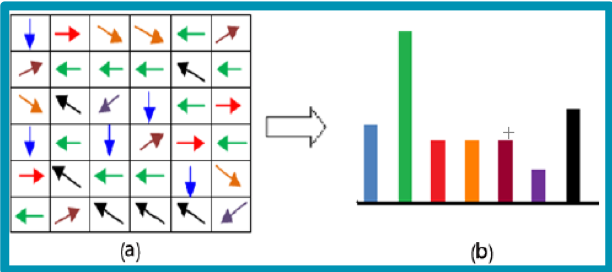

In [131]:
hog = Image.open('hog.png') # open image
display(hog)

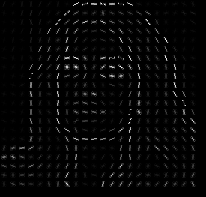

In [132]:
from skimage import feature
from skimage import exposure
x = cv2.imread('selma.png')

orientations=30
pixels_per_cell=(9, 9)
cells_per_block=(4, 4)
transform_sqrt=False

(H, hogImage) = feature.hog(x, 
                            orientations=orientations, 
                            pixels_per_cell=pixels_per_cell,
                            cells_per_block=cells_per_block, 
                            transform_sqrt=transform_sqrt, 
                            block_norm="L1",
                            visualise=True)

max_range = 400
hogImage = exposure.rescale_intensity(hogImage, out_range=(0, max_range)).astype("uint8")

display(Image.fromarray(hogImage, 'L'))

## Edges

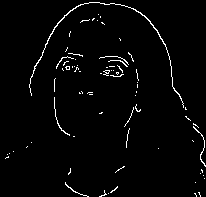

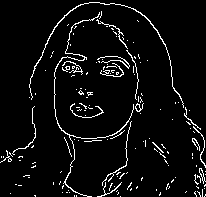

In [133]:
x = cv2.imread('selma.png')
# Canny Edges
c = cv2.Canny(x, 300, 300)
display(Image.fromarray( c, 'L'))
c = cv2.Canny(x, 150, 150)
display(Image.fromarray( c, 'L'))


## Vectorization

In [136]:
x = Image.open('selma.png') # open image
x = np.array(x) # to numpy array
x = x.flatten() # to 1D
x = x.tolist() # to list
print(x)

[103, 109, 135, 255, 103, 109, 135, 255, 105, 111, 137, 255, 105, 111, 137, 255, 106, 112, 138, 255, 108, 114, 140, 255, 108, 114, 138, 255, 107, 113, 137, 255, 107, 113, 137, 255, 106, 112, 136, 255, 105, 111, 135, 255, 104, 110, 134, 255, 104, 110, 134, 255, 104, 110, 134, 255, 104, 110, 134, 255, 105, 111, 135, 255, 106, 112, 137, 255, 107, 113, 139, 255, 109, 115, 141, 255, 112, 118, 144, 255, 114, 120, 146, 255, 118, 124, 151, 255, 120, 126, 153, 255, 120, 126, 153, 255, 122, 128, 155, 255, 123, 129, 156, 255, 123, 129, 156, 255, 126, 132, 159, 255, 128, 134, 161, 255, 130, 136, 163, 255, 133, 139, 166, 255, 135, 141, 169, 255, 135, 141, 169, 255, 135, 142, 170, 255, 137, 144, 172, 255, 136, 143, 171, 255, 137, 144, 172, 255, 137, 144, 172, 255, 137, 144, 172, 255, 139, 146, 174, 255, 142, 150, 177, 255, 144, 152, 180, 255, 144, 152, 180, 255, 143, 151, 179, 255, 144, 152, 180, 255, 145, 153, 181, 255, 145, 153, 181, 255, 146, 154, 182, 255, 149, 156, 184, 255, 150, 157, 185, 255,

## Algorithm - All Together

ORIGINAL


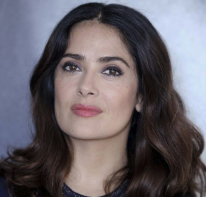

RED CHANNEL


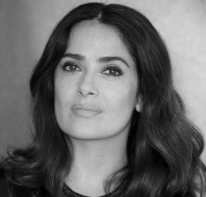

PYRAMID
25 x 24


EDGES


VECTORIZED
600  data points
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,

In [141]:
x = Image.open('selma.png') # open image

print('ORIGINAL')
display(x)

print('RED CHANNEL')
red, green, blue, alpha = x.split()
x = red
display(x)

print('PYRAMID')
w = x.size[0]
h = x.size[1]
w = int(w / 8)
h = int(h / 8)
x = x.resize((w, h), Image.BICUBIC)
w = x.size[0]
h = x.size[1]
print(w , "x" , h)
display(x) 


print('EDGES')
th=100 # the value has to be adjusted for an image of interest 
x = x.point(lambda i: i < th and 255)
display(x)


print('VECTORIZED')
x = np.array(x) # to numpy array
x = x.flatten() # to 1D
x = x.tolist() # to list
x = [1 if i==255 else 0 for i in x]
print(len(x), " data points")
print(x)


### AdaBoost ...or XGBoost ...or Deep Learning

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
y = True
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model = abc.fit(x, y)